In [ ]:
import pandas as pd    ###dataread###（1〜4行目と出力の上5行くらいを図示）
data  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Detail_Robotics/sensor_data_200.txt", delimiter=" ",
                    header=None, names = ("date","time","ir","lidar"))
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [ ]:
print(data["lidar"][0:5]) ###getvalues###

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


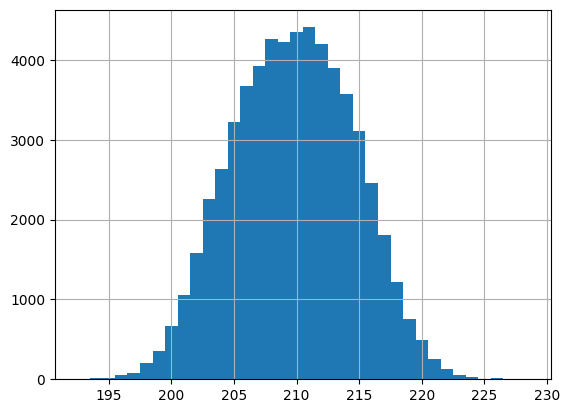

In [ ]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"] - min(data["lidar"])), align='left')
plt.show()

平均値を求める

In [ ]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)
mean2 = data["lidar"].mean()
print(mean1, mean2)

209.73713297619855 209.73713297619855


平均のラインを出力

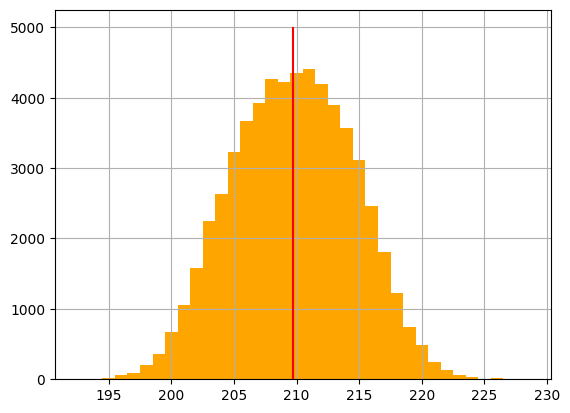

In [ ]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]), color = "orange", align="left")
plt.vlines(mean1, ymin=0, ymax = 5000, color = "red")
plt.show()

分散を求める

In [ ]:
zs = data["lidar"].values
mean = sum(zs)/len(zs)
diff_square = [(z - mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs))#標本分散
unbiased_var = sum(diff_square)/(len(zs)-1)#普遍分散

print("計算")
print(sampling_var)
print(unbiased_var)

#pandasを使用
pandas_sampling_var = data["lidar"].var(ddof=False)
pandas_default_var = data["lidar"].var()

print("Pandas")
print(pandas_sampling_var)
print(pandas_default_var)

#NumPy
import numpy as np

numpy_default_var = np.var(data["lidar"])#標本分散
numpy_unbiased_var = np.var(data["lidar"], ddof = 1)#不偏分散

print("numPy")
print(numpy_default_var)
print(numpy_unbiased_var)

計算
23.407709770274106
23.40810659855441
Pandas
23.4077097702742
23.408106598554504
numPy
23.4077097702742
23.408106598554504


標準偏差を求める

In [ ]:
import math

#定義から計算
stddev1 = math.sqrt(sampling_var)#標本分散からの標準偏差
stddev2 = math.sqrt(unbiased_var)#普遍分散から

#Pandas
pandas_stddev = data["lidar"].std()#ライブラリから標準偏差を求める

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.838192492920729


このことからライブラリでは普遍分散が使用されてる

要素の数

In [ ]:
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs.transpose()

lidar,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
count,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


確率の列を追加

In [ ]:
freqs["probs"] = freqs["count"]/len(freqs["count"])
freqs.transpose()

lidar,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
count,4409.000000,4355.000000,4261.000000,4228.0,4201.000000,3920.0,3897.000000,3674.000000,3572.000000,3225.000000,...,84.0,59.000000,55.000000,32.000000,15.000000,13.000000,10.000000,4.000000,3.000000,1.000000
probs,125.971429,124.428571,121.742857,120.8,120.028571,112.0,111.342857,104.971429,102.057143,92.142857,...,2.4,1.685714,1.571429,0.914286,0.428571,0.371429,0.285714,0.114286,0.085714,0.028571


In [ ]:
sum(freqs["probs"])

1685.3714285714282

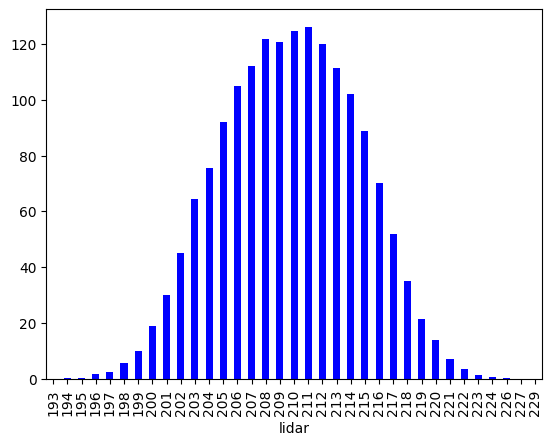

In [ ]:
freqs["probs"].sort_index().plot.bar(color="blue")
plt.show()

確率質量関数

In [ ]:
def drawing():
  return freqs.sample(n=1, weights="probs").index[0]

drawing()

210

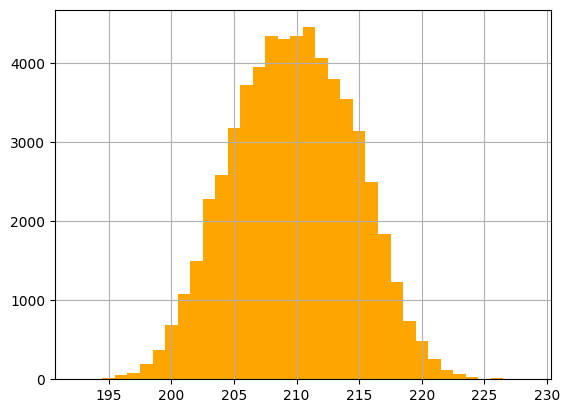

In [ ]:
samples = [drawing() for i in range(len(data))]
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
p.hist(bins = max(p) - min(p), color = "orange", align="left")
plt.show()

# 2.3 確率モデル

## 2.3.1ガウス分布のあてはめ

正規分布　公式から
*   平均mu=209.7mm
*   分散dev=23.4



In [ ]:
def p(z, mu=209.7, dev = 23.4):
  return math.exp(-(z - mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)


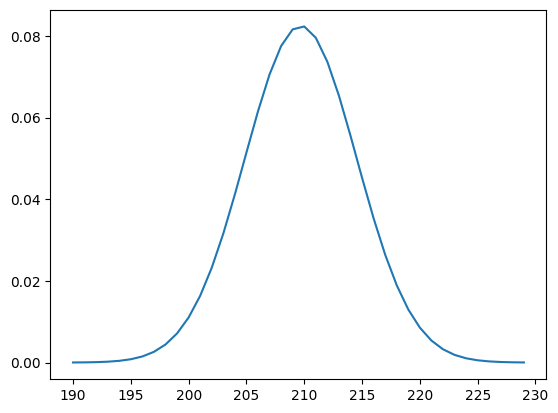

In [ ]:
zs = range(190, 230)
ys = [p(z) for z in zs]

plt.plot(zs, ys)
plt.show()

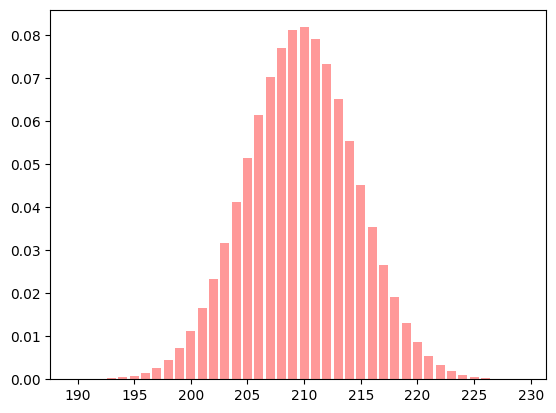

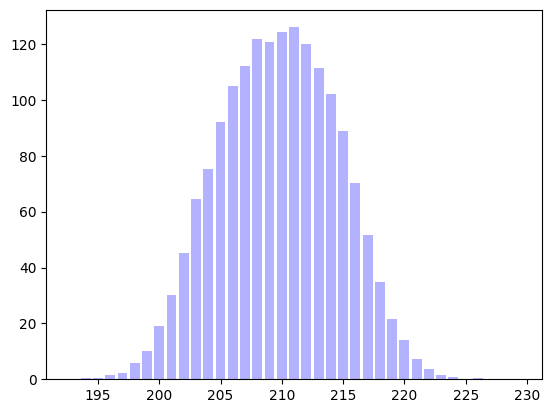

In [ ]:
def prob(z, width=0.5):
  return width*(p(z-width) + p(z+width))

zs =range(190, 230)
ys=[prob(z) for z in zs]
plt.bar(zs, ys, color="red", alpha=0.4)
plt.show()

f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.3)

plt.show()


## 2.3.2 確率密度関数

モジュールからガウス分布を生成

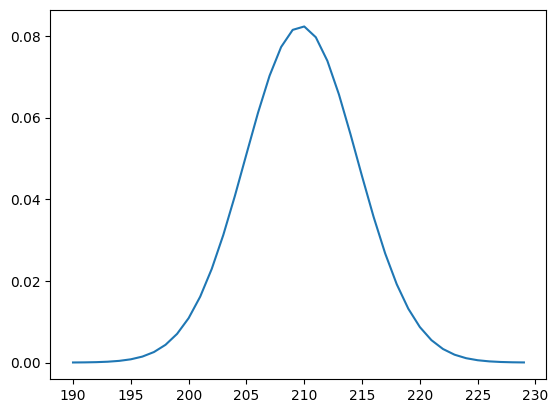

In [ ]:
from scipy.stats import norm

zs = range(190, 230)
ys = [norm.pdf(z, mean1, stddev1) for z in zs]

plt.plot(zs, ys)
plt.show()


累積分布関数

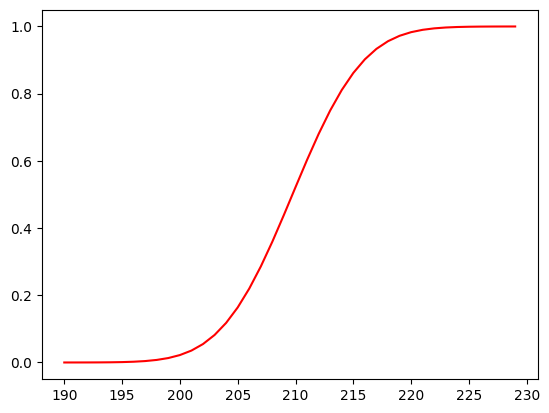

In [ ]:
zs = range(190, 230)
ys = [norm.cdf(z, mean1, stddev1) for z in zs]

plt.plot(zs, ys, color="red")
plt.show()

[30]で表した台形公式で実装した確率の計算=>確率の差で表せたもの

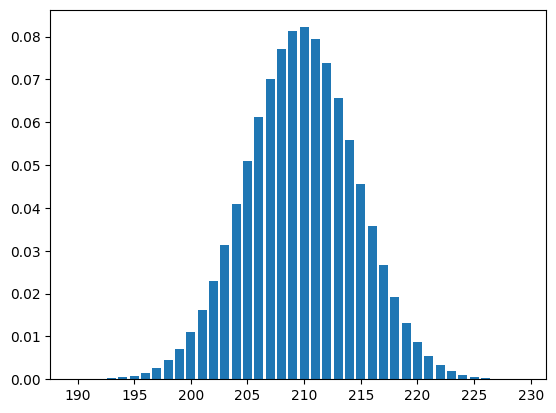

In [ ]:
zs = range(190, 230)
ys = [norm.cdf(z+0.5, mean1, stddev1) - norm.cdf(z - 0.5, mean1, stddev1) for z in zs]

plt.bar(zs, ys)
plt.show()

## 2.3.3 期待値

In [ ]:
import random

samples = [random.choice([1,2,3,4,5,6]) for i in range(10000)]
sum(samples)/len(samples)

3.4939

# 2.4 複雑な分布

## 2.4.1 条件付確率

*   インポート pd plt
*   定義 data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Detail_Robotics/sensor_data_600.txt", delimiter=" ",
                    header=None, names = ("date","time","ir","lidar"))

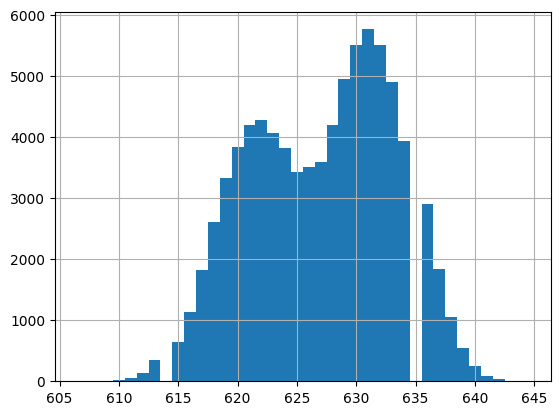

In [8]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]), align="left")
plt.show()

横軸がセンサ番号(順番にセンサの値を並べたグラフ)

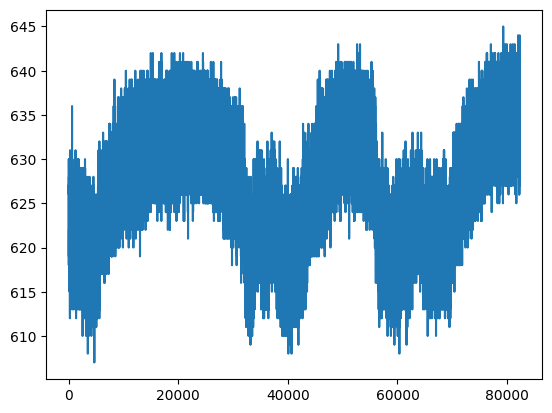

In [9]:
data.lidar.plot()
plt.show()

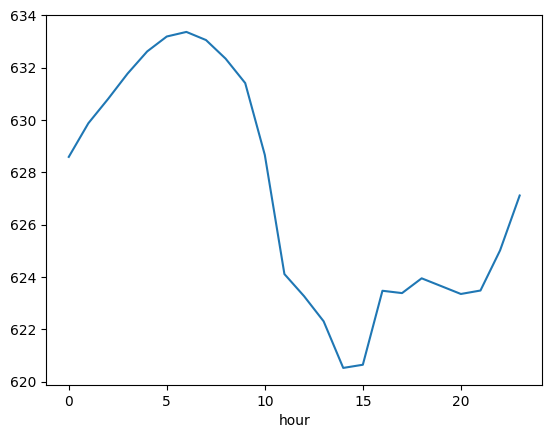

In [10]:
data["hour"] = [e//10000 for e in data.time]
d = data.groupby("hour")
d.lidar.mean().plot()
plt.show()


* 横：センサ値
*縦：頻度
 *   橙色・・・６時のセンサ値を集めたグラフ
 *   青色・・・14時のセンサ値を集めたグラフ



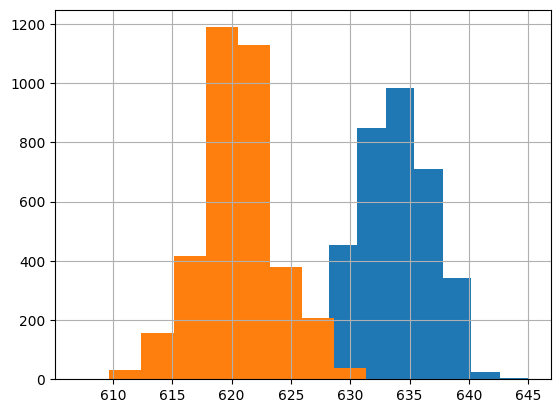

In [11]:
d.lidar.get_group(6).hist()     ###two_mode_hist###
d.lidar.get_group(14).hist()
plt.show()

## 2.4.2 同時確率と加法定理、乗法定理

In [12]:
each_hour = {i : d.lidar.get_group(i).value_counts().sort_index() for i in range(24)}
freqs = pd.concat(each_hour, axis=1)
freqs = freqs.fillna(0)
probs = freqs/len(data)

probs

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
lidar,,,,,,,,,,,,,,,,,,,,,
618,0.000036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004326,0.003791,0.001106,0.001750,0.001774,0.002272,0.002916,0.003135,0.001908,0.000401
619,0.000219,0.000049,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004982,0.004301,0.001810,0.002697,0.002309,0.003341,0.003657,0.003475,0.002539,0.000729
620,0.000389,0.000073,0.000036,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005140,0.005371,0.002892,0.003013,0.002710,0.004119,0.003900,0.003621,0.002685,0.001021
621,0.000559,0.000158,0.000036,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000,0.000000,...,0.004921,0.005650,0.003912,0.003706,0.003196,0.004435,0.003512,0.003985,0.003451,0.001895
622,0.001033,0.000219,0.000085,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000061,...,0.004799,0.005030,0.005407,0.004411,0.004180,0.003755,0.003062,0.003038,0.003475,0.002333
623,0.001604,0.000535,0.000231,0.000036,0.000049,0.000012,0.000012,0.000024,0.000012,0.000036,...,0.003985,0.003888,0.006185,0.004471,0.003864,0.002710,0.002357,0.002345,0.003268,0.003268
624,0.002175,0.000972,0.000547,0.000194,0.000061,0.000049,0.000024,0.000049,0.000097,0.000134,...,0.002782,0.003171,0.005553,0.004338,0.004301,0.002539,0.001835,0.001944,0.002685,0.003475
625,0.003062,0.001823,0.000911,0.000462,0.000146,0.000049,0.000085,0.000109,0.000292,0.000413,...,0.001823,0.002248,0.005152,0.003937,0.003669,0.001847,0.001106,0.001349,0.002369,0.003062
626,0.003742,0.002685,0.001507,0.001094,0.000462,0.000243,0.000219,0.000377,0.000559,0.000668,...,0.001349,0.001434,0.003755,0.003402,0.003524,0.001944,0.001252,0.001057,0.002066,0.003548


P(z,t)を視覚的に図示

In [13]:
import seaborn as sns

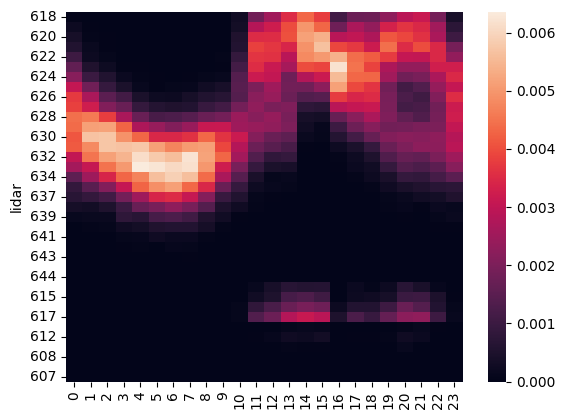

In [14]:
sns.heatmap(probs)
plt.show()

P(z,t)の確率分布 = 同時確率分布or結合確率分布


*   ↑P(z,t)を時間ごとに合計したグラフ
*   →P(z,t)をセンサ値ごとに合計したグラフ



[5]　のグラフと→のグラフが同じ

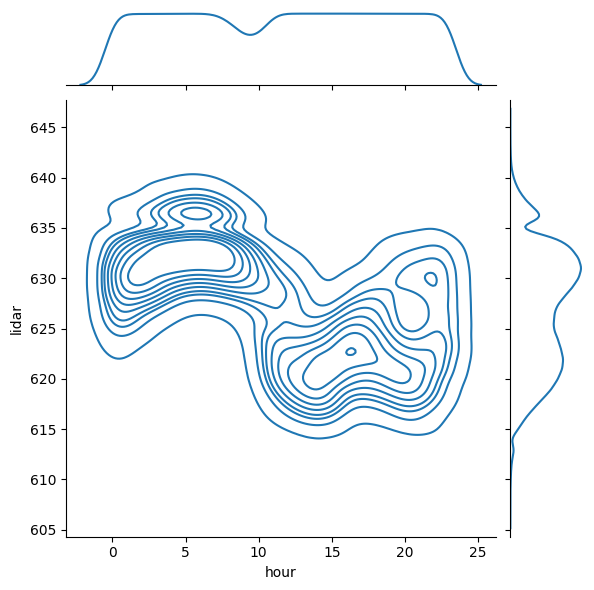

In [15]:
sns.jointplot(data, x="hour", y="lidar", kind ="kde")
plt.show()

[15]の図の上側

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.043013,0.042916,0.042879,0.042916,0.042964,0.043037,0.043061,0.043001,0.038712,0.028651,...,0.043183,0.043122,0.043061,0.043122,0.043049,0.043086,0.043159,0.042976,0.043049,0.043037


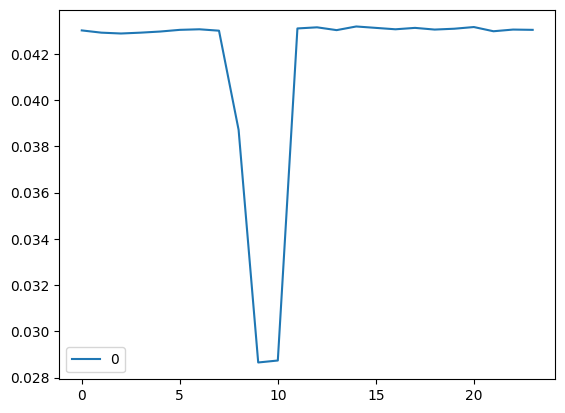

In [18]:
p_t = pd.DataFrame(probs.sum())#各列を合計
p_t.plot()
p_t.transpose()#紙面の関係で表を横並びに

In [19]:
p_t.sum()

,0
0,1.0


[15]の図の右側

lidar,607,608,609,610,611,612,613,615,616,617,...,636,637,638,639,640,641,642,643,644,645
0,0.000012,0.000049,0.000061,0.000328,0.00068,0.00158,0.004241,0.007752,0.013852,0.022053,...,0.03537,0.02226,0.012819,0.006671,0.002989,0.000996,0.000401,0.000109,0.000024,0.000012


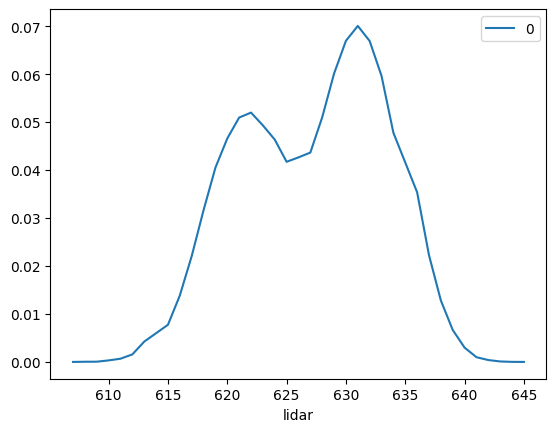

In [20]:
p_z = pd.DataFrame(probs.transpose().sum()).sort_values("lidar")#行と列を転置して各列を合計
p_z.plot()
p_z.transpose()

P(x|t)(ある時間tの時のデータ値xである条件つき確率)

In [21]:
cond_z_t = (probs/p_t[0]).sort_values("lidar")  #列（時間）ごとにP(t)で割るとP(x|t)となる   ###lidar600cond #旧バージョン: cond_z_t = probs/p_t[0]
cond_z_t

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
lidar,,,,,,,,,,,,,,,,,,,,,
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000283,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000283,0.000282,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000844,0.001127,0.000000,0.000000,0.000282,0.000282,0.003097,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003376,0.002818,0.000000,0.000000,0.000000,0.000564,0.001689,0.003393,0.001129,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005065,0.007326,0.000000,0.000845,0.000847,0.001410,0.005912,0.004524,0.000564,0.000282
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014350,0.014934,0.000564,0.004227,0.001411,0.005076,0.015766,0.010178,0.002540,0.000565
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030107,0.024232,0.000564,0.004790,0.006209,0.008742,0.022804,0.023749,0.011008,0.001129
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.045301,0.041984,0.005079,0.013807,0.013830,0.023689,0.039977,0.032513,0.013830,0.001976


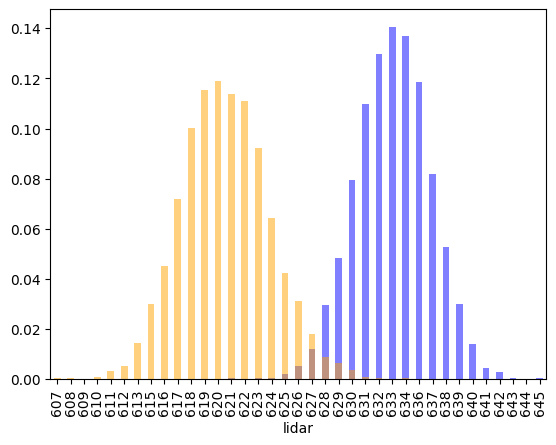

In [22]:
(cond_z_t[6]).plot.bar(color="blue", alpha=0.5)  ###lidar600pxt###
(cond_z_t[14]).plot.bar(color="orange", alpha=0.5)
plt.show()

## 2.4.3 独立、従属、条件つき独立

## 2.4.4 確率分布の性質を利用した計算

## 2.4.5 ベイズの定理

# 2.5 多次元のガウス分布

## 2.5.1 二次元ガウス分布の当てはめ

## 2.5.2 共分散の意味

## 2.5.3 共分散行列と誤差楕円

## 2.5.4 変数の和に対するガウス分布の合成

## 2.5.5 ガウス分布同士の積